# Frequencies

$$y = A \sin (Bx + C) + D$$

where:
* $A$ is the amplitude
* the period is $\frac{2\pi}{B}$
* the phase shift is $\frac{-C}{D}$
* the vertical shift is $D$

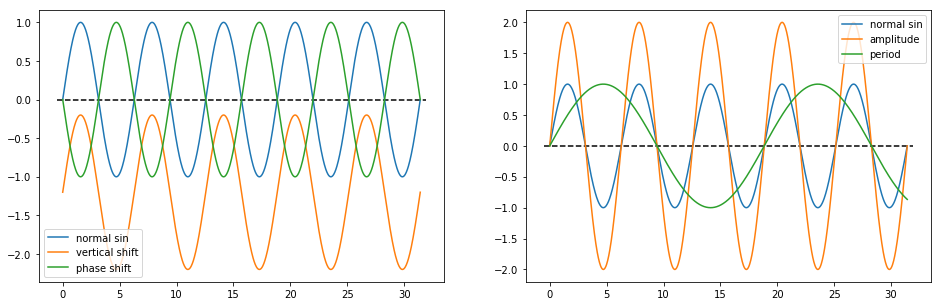

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def frequency(A, B, C, D):
    return lambda x: A * np.sin(B * x + C) + D

y = frequency(1, 1, 0, 0)

END = 10 * pi
X = np.linspace(0, 10 * pi, 1000)

Y = y(X)
Y_vertical = frequency(1, 1, 0, -1.2)(X)
Y_ps1 = frequency(1, 1, pi, 0)(X)
Y_ampl = frequency(2, 1, 0, 0)(X)
Y_period = frequency(1, 1/3, 0, 0)(X)

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
ax.plot([-0.5, END+0.5], [0, 0], color='black', ls='--')
ax.plot(X, Y, label="normal sin")
ax.plot(X, Y_vertical, label="vertical shift")
ax.plot(X, Y_ps1, label="phase shift")

plt.legend()

ax = fig.add_subplot(122)
ax.plot([-0.5, END+0.5], [0, 0], color='black', ls='--')
ax.plot(X, Y, label="normal sin")
ax.plot(X, Y_ampl, label="amplitude")
ax.plot(X, Y_period, label="period")

plt.legend()
plt.show()

## Fourier series

Spatial frequency analysis of a step function

$$
f(x) = \sum_n a_n \sin nx \\
\Leftrightarrow a_n = \frac{1}{\pi} f(x) \sin nx \ dx
$$

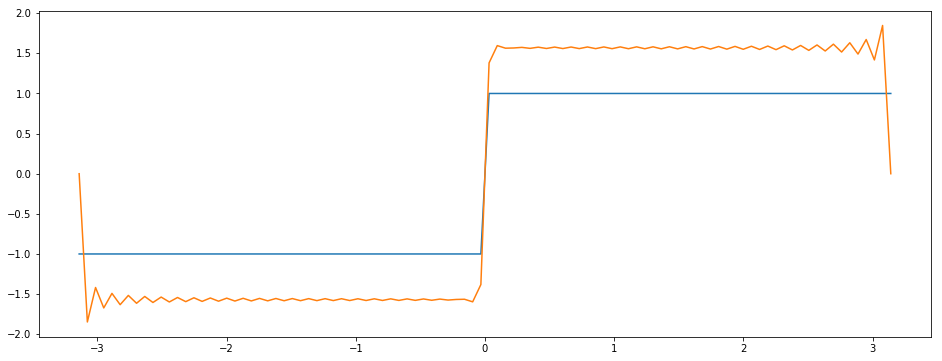

In [148]:
from math import cos, sin

X = np.linspace(-pi, pi, 100)

f = lambda x: 1 if x > 0 else -1
Y = [f(x) for x in X]

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax.plot(X, Y)

I = 1000
integral = np.linspace(-pi, pi, I)

N = 50
def ft(f, N=3):
    a = [0] * N
    for n in range(N):
        total = 0
        for x in integral:
            total += f(x) * sin(n * x)
        #a[n] = 1/pi * (total)
        a[n] = (pi/I) * total
    return a

a_n = ft(f, N=N)

def ft_apply(f, a, X):
    N = len(a)
    y = []
    for x in X:
        total = 0
        for n in range(N):
            total += a[n] * sin(n * x)
        y.append(total)
    return y

y_hat = ft_apply(f, a_n, X)

ax.plot(X, y_hat)

plt.show()